''' The attributes of the data was chenged for security purposes.
    class distribution:
    class 0: 99.83%
    class 1: 0.17% 
    missing attributes = 0'''


In [1]:
#import the required libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#creating a function to plot confusion and precision matrix
def confusion_precision_plot(actual_data, predicted_data):
    c = confusion_matrix(actual_data, predicted_data)
    labels=[0,1]
    print('Confusion Plot :')
    plt.figure(figsize=[13,10])
    sns.heatmap(c, annot=True,fmt='0.2f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()
    b = (c/c.sum(axis=0))
    print('Precision Plot :')
    plt.figure(figsize=[13,10])
    sns.heatmap(b, annot=True, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual class')
    plt.show()
#creating a function to show permutation importance
def perm_imp(xtest, ytest, model):
    perm = PermutationImportance(model).fit(xtest,ytest)
    return eli5.show_weights(perm, feature_names = xtest.columns.tolist())


In [3]:
#loading the dataset to df
df = pd.read_csv(r"C:\Users\Yunghil\Downloads\data Science pract\creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
#seperating dependent attributes from independent attributes
x = df.drop(['Class'], axis=1)
y=df.Class
#splitting the data set into three parts: train data, test data, cross-valid data.
Xtrain, x_test, Ytrain, y_test =train_test_split(x, y, test_size=0.2, random_state=2)
x_train, x_cv, y_train, y_cv =train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=2)
print('Rows in Train data : ', x_train.shape[0])
print('Rows in Test data : ',x_test.shape[0])
print('Rows in cv data : ',x_cv.shape[0])

Rows in Train data :  182276
Rows in Test data :  56962
Rows in cv data :  45569


In [ ]:
order=[x for x in range(1,100,10)]
rsqu=[]
for x in order:
    rfc=RandomForestClassifier(n_estimators=x).fit(x_train,y_train)
    rsqu.append(rfc.score(x_cv,y_cv))
plt.plot(order,rsqu)
plt.grid()
plt.xlabel('order')
plt.ylabel('score')
plt.show()

In [5]:
rfc=RandomForestClassifier(n_estimators=15).fit(x_train,y_train)
print(rfc.score(x_cv, y_cv))
predict_rfc = rfc.predict(x_cv)
print(classification_report(y_cv, predict_rfc))

0.9995172156509908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45493
           1       0.97      0.74      0.84        76

   micro avg       1.00      1.00      1.00     45569
   macro avg       0.98      0.87      0.92     45569
weighted avg       1.00      1.00      1.00     45569



Confusion Plot :


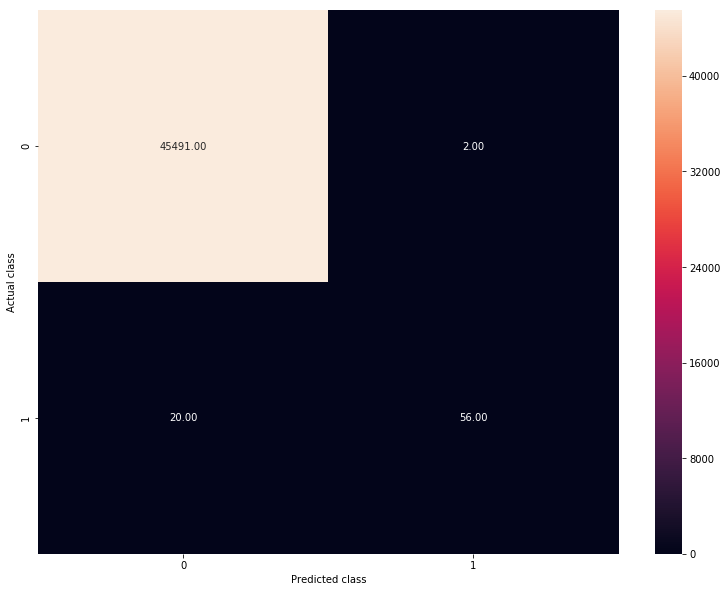

Precision Plot :


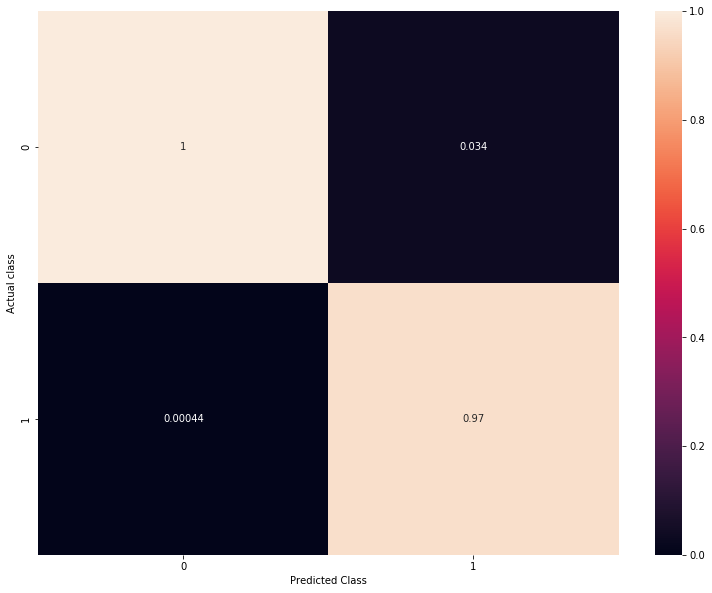

In [6]:
confusion_precision_plot(y_cv, predict_rfc)

In [7]:
perm_imp(x_cv,y_cv,rfc)

Weight,Feature
0.0003 ± 0.0001,V14
0.0001 ± 0.0000,V26
0.0001 ± 0.0000,V10
0.0001 ± 0.0000,V17
0.0000 ± 0.0000,V6
0.0000 ± 0.0000,V4
0.0000 ± 0.0000,V18
0.0000 ± 0.0000,V24
0.0000 ± 0.0000,V12
0.0000 ± 0.0000,Time


# Using logistic regression

In [8]:
lr = LogisticRegression().fit(x_train,y_train)
print('Accuracy score : ',lr.score(x_cv, y_cv))
predict_lr = lr.predict(x_cv)
print(classification_report(y_cv, predict_lr))

Accuracy score :  0.9992099892470758
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45493
           1       0.87      0.62      0.72        76

   micro avg       1.00      1.00      1.00     45569
   macro avg       0.93      0.81      0.86     45569
weighted avg       1.00      1.00      1.00     45569



Confusion Plot :


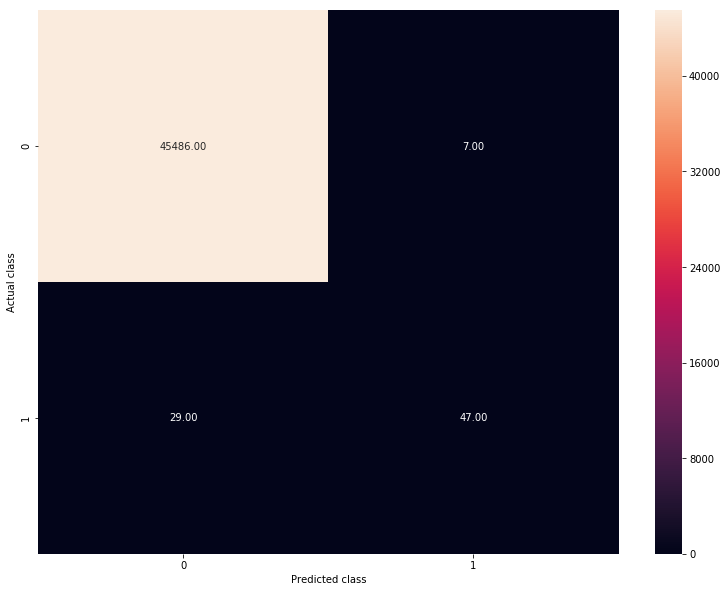

Precision Plot :


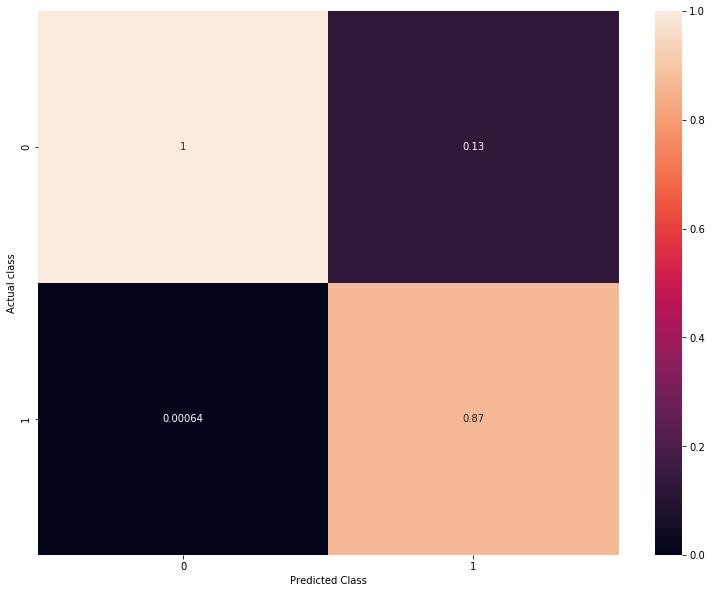

In [9]:
confusion_precision_plot(y_cv, predict_lr)

In [10]:
perm_imp(x_cv,y_cv,lr)

Weight,Feature
0.0045 ± 0.0006,Time
0.0025 ± 0.0003,V3
0.0020 ± 0.0001,Amount
0.0011 ± 0.0002,V2
0.0009 ± 0.0002,V14
0.0006 ± 0.0001,V17
0.0003 ± 0.0001,V8
0.0003 ± 0.0001,V1
0.0003 ± 0.0001,V7
0.0002 ± 0.0000,V10


# Using Decision Tree

In [11]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predict_dtc = dtc.predict(x_cv)
print('Accuracy score :', dtc.score(x_cv, y_cv))
print(classification_report(y_cv, predict_dtc))

Accuracy score : 0.9989247075862977
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45493
           1       0.66      0.72      0.69        76

   micro avg       1.00      1.00      1.00     45569
   macro avg       0.83      0.86      0.85     45569
weighted avg       1.00      1.00      1.00     45569



Confusion Plot :


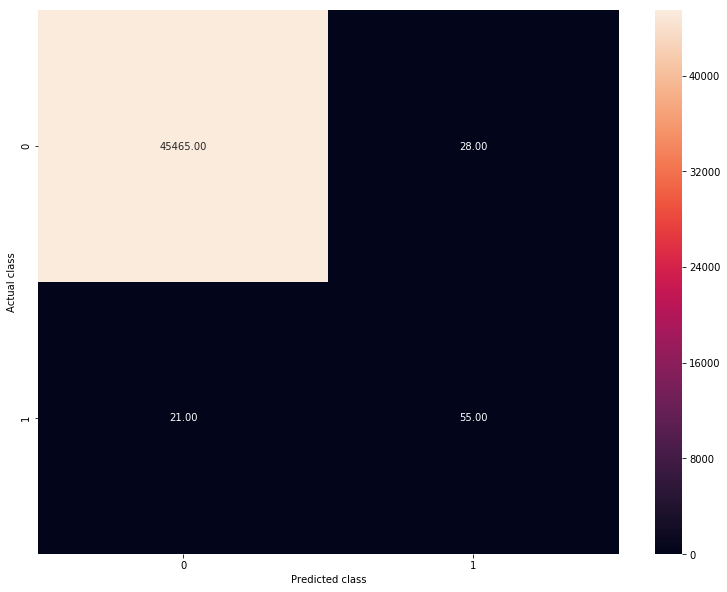

Precision Plot :


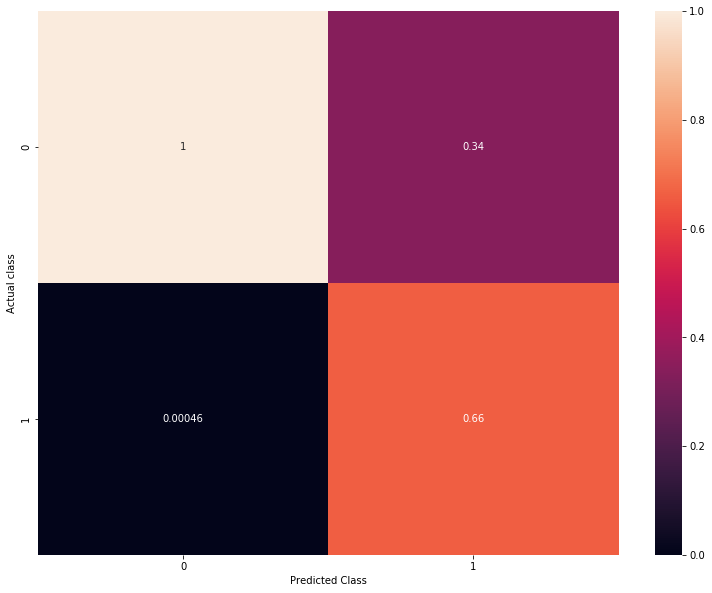

In [12]:
confusion_precision_plot(y_cv, predict_dtc)

In [13]:
perm_imp(x_cv, y_cv, dtc)

Weight,Feature
0.0021 ± 0.0002,V1
0.0015 ± 0.0001,V14
0.0014 ± 0.0002,V7
0.0008 ± 0.0001,V12
0.0008 ± 0.0002,V21
0.0007 ± 0.0002,V17
0.0004 ± 0.0001,V4
0.0002 ± 0.0001,V11
0.0002 ± 0.0001,V3
0.0002 ± 0.0001,V27


# Testing 'rfc' with our test data 

In [14]:
rfc.score(x_test,y_test)

0.9996313331694814

In [15]:
predict_RFC = rfc.predict(x_test)
print(classification_report(y_test, predict_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.93      0.81      0.87        84

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Confusion Plot :


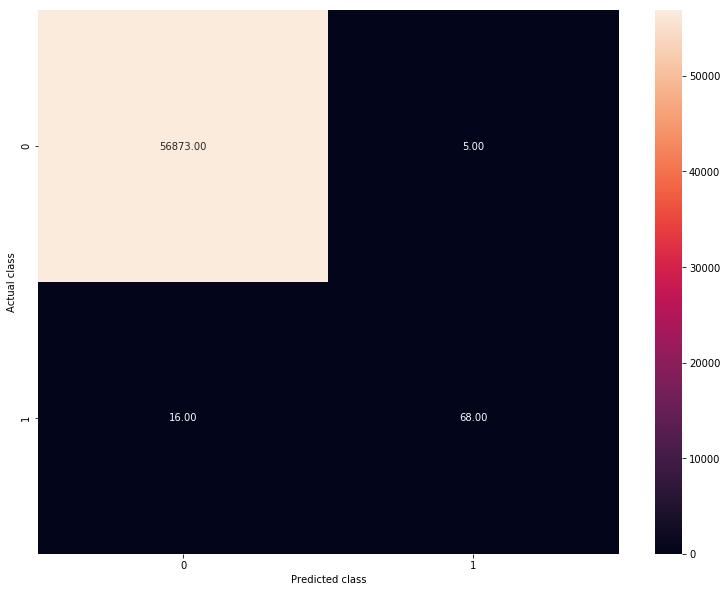

Precision Plot :


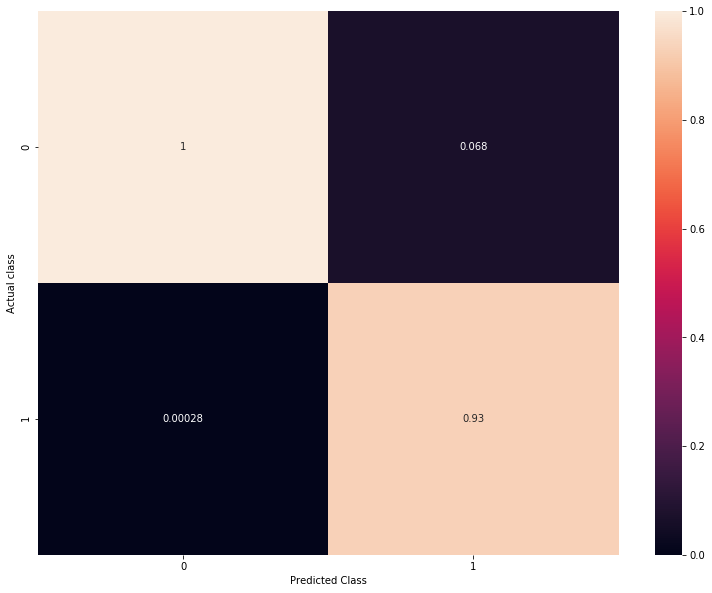

In [16]:
confusion_precision_plot(y_test, predict_RFC)

In [17]:
perm_imp(x_test,y_test,rfc)

Weight,Feature
0.0003 ± 0.0001,V14
0.0001 ± 0.0000,V17
0.0001 ± 0.0000,V26
0.0001 ± 0.0000,V10
0.0000 ± 0.0000,V4
0.0000 ± 0.0000,V11
0.0000 ± 0.0000,V16
0.0000 ± 0.0000,V27
0.0000 ± 0.0000,V12
0.0000 ± 0.0000,V19
